# Gemaakt op 12/05/2025 door martijn

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st

### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

In [3]:
my_data = pd.read_csv("./games.csv")
my_data

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


## expectations

ik ga het uitvoeren op rating en linux, ik gok dat er een verschil zit, want linux heeft veel minder games. Ik denk ook dat de linux games meer positive reviews hebben dan negative, en bij niet linux games het meer uitgevlakt is

In [4]:
from scipy.stats import chi2_contingency

def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    print(chi2)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(
        f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [5]:
gamesContingencyTable = create_contingency_table(my_data, 'linux','rating')
gamesContingencyTable

linux,False,True
rating,,
Mixed,10383,1774
Mostly Negative,1614,235
Mostly Positive,7212,1526
Negative,279,24
Overwhelmingly Negative,10,4
Overwhelmingly Positive,781,329
Positive,11356,2146
Very Negative,59,1
Very Positive,10137,3002


het is opvallend dat er meer is van alles wanneer linux false is, maar dat komt gewoon omdat er veel minder linux suprted games zijn. ik kan hier nog niet echt iets aflezen

<Axes: xlabel='rating'>

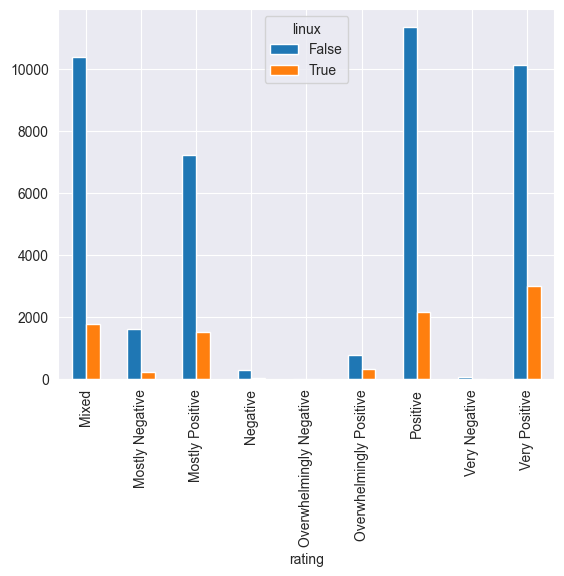

In [6]:
gamesContingencyTable.plot(kind='bar')

het 1e wat me opvalt is dat het er op eerste ogenblik ongeveer het zelfde uit ziet, maar als je goed kijkt zie je toch verschillen
linux heeft in verband meer `very positive` dan `positive` in vergelijking tot niet linug games.
verder lijkt er ook relatief minder `mixed` reviews te zijn, bij niet linug games is die colomn net zo veel als `very positive`, maar bij linux games is dat veel minder.

dit betekent dus dat mijn hypothese klopt, linux mgames hebben in het algemeen betere reviews. Maar nu is de vraag of er ook echt een relatie tussen zit, want dit kan ook gewoon een lucky result zijn. of een verkeerde aflezing van een grafiek


In [7]:
check_cat_vs_cat_correlation(my_data, 'linux','rating')

Chi2ContingencyResult(statistic=np.float64(520.2106585293366), pvalue=np.float64(3.2359805560820074e-107), dof=8, expected_freq=array([[9.99645123e+03, 2.16054877e+03],
       [1.52039470e+03, 3.28605304e+02],
       [7.18507780e+03, 1.55292220e+03],
       [2.49150672e+02, 5.38493277e+01],
       [1.15119123e+01, 2.48808775e+00],
       [9.12730186e+02, 1.97269814e+02],
       [1.11024171e+04, 2.39958291e+03],
       [4.93367668e+01, 1.06632332e+01],
       [1.08039296e+04, 2.33507035e+03]]))
The odds of a correlation between linux and rating is 100.0% (Based on a p value of 3.2359805560820074e-107).
This percentage needs to be at least 95% for a significant correlation.


we zien hier dat er gene significante corelatie is tussen `linux` en `rating`. Want hiervoor ligt e P value veel te hoog. De P waarde moet namelijk minder zijn dan 0.05.